In [35]:
import pandas as pd
import numpy as np
import sys
import random

In [2]:
num_of_rows = 6500
df = pd.read_csv('./dating-full.csv', nrows=num_of_rows)
df.shape


(6500, 53)

In [3]:
# df.drop(columns = ['race_Other'], axis=1, inplace=True)
df.drop(columns = ['race_o', 'race', 'field'], axis=1, inplace=True)
df.shape

(6500, 50)

In [4]:
def label_encoding(df, label_encoding_list):
    encoding_dict = {}
    for col in label_encoding_list:
        unique_val = np.unique(df[col].values)
        val_dict = {}
        encoding_value = 0
        for val in unique_val:
            val_dict[val]=encoding_value
            df[col].replace(val, encoding_value, inplace=True)
            encoding_value+=1
        encoding_dict[col] = val_dict
    return df

In [5]:
label_encoding_list = ['gender']
df = label_encoding(df, label_encoding_list)

In [6]:
df.head(5)

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,decision
0,0,21,27,0,2,4,35.0,20.0,20.0,20.0,...,1,10,10,9,8,1,0.14,3,7.0,1
1,0,21,22,0,2,4,60.0,0.0,0.0,40.0,...,1,10,10,9,8,1,0.54,3,7.0,1
2,0,21,23,0,2,4,30.0,5.0,15.0,40.0,...,1,10,10,9,8,1,0.61,3,7.0,1
3,0,21,24,0,2,4,30.0,10.0,20.0,10.0,...,1,10,10,9,8,1,0.21,3,6.0,1
4,0,21,25,0,2,4,50.0,0.0,30.0,10.0,...,1,10,10,9,8,1,0.25,3,6.0,0


In [7]:
def normalize(df, preference_scores_of_participant, preference_scores_of_partner):
    for ind in df.index:
        total=0
        for col in preference_scores_of_participant:
            total+= df[col][ind]
        for col in preference_scores_of_participant:
            df.loc[ind, col] = df[col][ind]/total
        total=0
        for col in preference_scores_of_partner:
            total+= df[col][ind]
        for col in preference_scores_of_partner:
            df.loc[ind, col] = df[col][ind]/total
            # df[col][ind] = df[col][ind]/total
    # for col in preference_scores_of_participant:
    #     print("Mean of "+ col + ": " ,round(df[[col]].mean()[0], 2))
    # for col in preference_scores_of_partner:
    #     print("Mean of "+ col + ": " , round(df[[col]].mean()[0], 2))
    return df 

In [8]:
preference_scores_of_participant = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important', 'ambition_important', 'shared_interests_important']
preference_scores_of_partner = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
df = normalize(df, preference_scores_of_participant, preference_scores_of_partner)

In [9]:
def binning_continuous_valued_columns(df, continuous_valued_columns, preference_scores_of_participant, preference_scores_of_partner, number_of_bins):
    binned_dict = {}
    for col in continuous_valued_columns:
        min_val = 0
        max_val = 10
        if col=='age' or col == 'age_o':
            min_val = 18
            max_val = 58
        elif col in preference_scores_of_participant or col in preference_scores_of_partner:
            min_val = 0
            max_val = 1
        elif col == 'interests_correlate':
            min_val = -1
            max_val = 1
        bins = np.linspace(min_val,max_val,number_of_bins+1)
        df.loc[df[col] < min_val, col] = max_val
        df.loc[df[col] > max_val, col] = max_val
        df[col] = pd.cut(df[col],bins, include_lowest=True, labels= np.arange(number_of_bins))
        binned_dict[col] = df[col].value_counts().sort_index().values
        # print(col, df[col].value_counts().sort_index().values)
    return binned_dict

In [10]:
preference_scores_of_participant = ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important', 'ambition_important', 'shared_interests_important']
preference_scores_of_partner = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']
continuous_valued_columns = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 
        'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
       'attractive_important', 'sincere_important', 'intelligence_important',
       'funny_important', 'ambition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_parter',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'interests_correlate',
       'expected_happy_with_sd_people', 'like']

binned_dict = binning_continuous_valued_columns(df, continuous_valued_columns, preference_scores_of_participant, preference_scores_of_partner,2)
df.head(5)

,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,decision
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,1
1,0,0,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,0


In [11]:
df['intelligence_parter'].value_counts()

1    5793
0     707
Name: intelligence_parter, dtype: int64

In [12]:
def train_test_split(df):
    test_df = df.sample(random_state=47, frac=0.2)
    train_df = df.drop(test_df.index)
    return train_df, test_df

train_df, test_df = train_test_split(df)
train_df.to_csv('trainingSet.csv', index = False)
test_df.to_csv('testSet.csv', index = False)

In [13]:
X_train = train_df.values[0:, 0:49]
Y_train = train_df.values[0:, 49:50]
X_train.shape

(5200, 49)

In [14]:
def get_feature_labels_data(df):
    X = df.values[0:,0:49]
    Y = df.values[0:,49:50]
    return X, Y

In [15]:
X_train, Y_train = get_feature_labels_data(train_df)
X_train.shape

(5200, 49)

In [32]:
def MajorityVote(data, target_label):
    decision_column=data[target_label]
    max_count=0
    max_key=-100
    decision_count = decision_column.value_counts()
    for key in decision_count.keys():
        value=decision_count[key]
        if value>max_count:
            max_count=value
            max_key=key
    return max_key

def Build_Tree(tree_dict, data, feature_list, target_label, max_depth, min_example):
    if len(feature_list)==1:#Only aim list left
        return MajorityVote(data, target_label)
    choose_feature=None
    best_gain=-1000000

    # decision_column=data[feature_list[-1]]
    decision_column=data[target_label]
    decision_count=decision_column.value_counts()
    total_gini=1
    for key in decision_count.keys():
        value=decision_count[key]
        total_gini-=(value/len(decision_column))**2

    for feature in feature_list[:-1]:
        study_column=data[feature]
        feature_count=study_column.value_counts()
        feature_gain=total_gini
        for key in feature_count.keys():
            value=feature_count[key]
            percentage=value/len(study_column)
            small_total_gini=1
            study_data=data[data[feature]==key]
            decision_column = study_data[feature_list[-1]]
            decision_count = decision_column.value_counts()
            for key in decision_count.keys():
                value = decision_count[key]
                small_total_gini -= (value / len(decision_column)) ** 2
            feature_gain-=percentage*small_total_gini
        if feature_gain>best_gain:
            best_gain=feature_gain
            choose_feature=feature

    tmp_dict={}
    study_column = data[choose_feature]
    feature_count = study_column.value_counts()
    use_feature=feature_list.copy()
    use_feature.remove(choose_feature)

    if  len(data)<= min_example or max_depth == 0:
        tree_dict[choose_feature] = MajorityVote(data[data[choose_feature]], target_label)
        return tree_dict

    tmp_dict['major']=MajorityVote(data, feature_list)
    for key in feature_count.keys():
        value=feature_count[key]
        if value <= min_example or max_depth == 1:
            tmp_dict[key] = MajorityVote(data[data[choose_feature]==key], target_label)
        else:
            tmp_dict[key]=Build_Tree({},data[data[choose_feature]==key],use_feature, target_label, max_depth-1,min_example)
            
    tree_dict[choose_feature]=tmp_dict
    return tree_dict

def pred_label(tree_dict,data):
    for key in tree_dict.keys():
        new_dict=tree_dict[key]
        value=data[key]
        if type(new_dict)!=dict:
            return new_dict
        if value not in new_dict:
            return new_dict['major']

        now_dict=new_dict[value]
        if type(now_dict)!=dict:
            return now_dict
        else:
            return pred_label(now_dict,data)

def pred(tree_dict,data):
    num = len(data)
    count=0
    for i in range(len(data)):
        pred=pred_label(tree_dict,data.iloc[i,:])
        if pred==data.iloc[i,-1]:
            count+=1
    return float(count)/num

def decisionTree(trainingSet, testSet):
    max_depth=8
    min_example=50
    
    #Now build tree using dict
    tree_dict={}
    feature_list=list(trainingSet.columns)
    target_label = feature_list[-1]
    #print(feature_list)

    #It's only for 0 and 1 attribute. Therefore, we only need to find the feature
    tree_dict=Build_Tree(tree_dict,trainingSet,feature_list, target_label, max_depth,min_example)
    #print(tree_dict)
    train_accu=pred(tree_dict,trainingSet)
    test_accu=pred(tree_dict,testSet)
    return train_accu,test_accu

In [33]:
train_df = pd.read_csv('trainingSet.csv')
test_df = pd.read_csv('testSet.csv')

In [34]:
train_acc, test_acc = decisionTree(train_df, test_df)
print('Training Accuracy DT: %.2f'%train_acc)
print('Testing Accuracy DT: %.2f' % test_acc)

Training Accuracy DT: 0.77
Testing Accuracy DT: 0.72


In [19]:
feature_list=list(train_df.columns)
len(feature_list)

50

In [38]:
def DT(trainingSet):
    max_depth=8
    min_example=50
    #Now build tree using dict
    tree_dict={}
    feature_list=list(trainingSet.columns)
    target_label = feature_list[-1]
    #print(feature_list)

    #It's only for 0 and 1 attribute. Therefore, we only need to find the feature
    tree_dict=Build_Tree(tree_dict,trainingSet,feature_list,target_label,max_depth,min_example)
    return tree_dict

def Evaluate_BT(Tree_lists, data):
    count=0
    for i in range(len(data)):
        pred_list={}
        for k in range(len(Tree_lists)):
            pred=pred_label(Tree_lists[k],data.iloc[i,:])
            if pred not in pred_list:
                pred_list[pred]=1
            else:
                pred_list[pred] += 1
        max_key=-1
        max_count=-1000
        for key in pred_list.keys():
            if pred_list[key]>max_count:
                max_count=pred_list[key]
                max_key=key
        if max_key==data.iloc[i,-1]:
            count+=1
    return count/len(data)

def bagging(trainingSet,testSet):
    Tree_lists = []
    percent = 1
    for k in range(30):
        rand_state=random.randint(0,1000000)
        tmp_train = trainingSet.sample(random_state=rand_state, replace=True,frac=percent)
        tmp_tree = DT(tmp_train)
        Tree_lists.append(tmp_tree)
    train_accu=Evaluate_BT(Tree_lists,trainingSet)
    test_accu = Evaluate_BT(Tree_lists, testSet)
    return train_accu,test_accu

In [39]:
train_accu,test_accu=bagging(train_df,test_df)
print('Training Accuracy BT: %.2f' % train_accu)
print('Testing Accuracy BT: %.2f' % test_accu)

Training Accuracy BT: 0.79
Testing Accuracy BT: 0.74


In [40]:
def randomForests(trainingSet,testSet):
    Tree_lists = []
    percent = 0.5
    for k in range(30):
        rand_state = random.randint(0, 1000000)
        tmp_train = trainingSet.sample(random_state=rand_state, replace=True,frac=percent)
        tmp_feature=list(tmp_train.columns)
        use_feature=random.sample(tmp_feature[:-1], int(np.sqrt(len(tmp_feature)-1)))+[tmp_feature[-1]]
        tmp_train=tmp_train[use_feature]
        #print(tmp_train.head(5))
        tmp_tree = DT(tmp_train)
        #print('finish %d trees'%(k+1))
        Tree_lists.append(tmp_tree)
    train_accu = Evaluate_BT(Tree_lists, trainingSet)
    test_accu = Evaluate_BT(Tree_lists, testSet)
    return train_accu, test_accu

In [41]:
train_accu, test_accu = randomForests(train_df, test_df)
print('Training Accuracy RF: %.2f' % train_accu)
print('Testing Accuracy RF: %.2f' % test_accu)

Training Accuracy RF: 0.69
Testing Accuracy RF: 0.67


In [49]:
train_df = pd.read_csv('trainingSet.csv')
test_df = pd.read_csv('testSet.csv')

In [50]:
train_df = train_df.sample(random_state=18, frac=1)
percent = 0.5
half_train_df = train_df.sample(random_state=32, frac=percent)
len(half_train_df)

2600

In [51]:
def get_kfold_split(train_set, fold_number):
    # train_set = pd.read_csv(input_filename)
    # train_set = train_set.sample(random_state=18, frac=1)
    # fold_number = 10
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

def get_train_test_data(fold_data_list, fraction, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    new_train_set = pd.concat(rem_set)
    new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    # new_X_train, new_y_train = q2.get_features_labels(new_train_set)
    # new_X_test, new_y_test = q2.get_features_labels(test_set)
    return new_train_set, test_set

In [74]:
import matplotlib.pyplot as plt
import trees as q2

In [78]:


def compare_models(fold_data_list, depth_list, fold_number):
    dt_model_accuracy = []
    bt_model_accuracy = []
    rf_model_accuracy = []
    for d in depth_list:
        print("Current depth:", d)
        dt_frac_accuracy = []
        bt_frac_accuracy = []
        rf_frac_accuracy = []
        for ind in range(fold_number):
            print("Current fold:", ind)
            train_set, test_set = get_train_test_data(fold_data_list, 1, ind)
            print(len(train_set), len(test_set))
            # train dt
            # train_acc,test_acc = q2.decisionTree(train_set, test_set, d) 
            dt_frac_accuracy.append(0)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # train bt
            # train_acc,test_acc = q2.bagging(train_set, test_set, d) 
            train_acc,test_acc = q2.bagging(train_set, test_set, d)
            bt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # #dataset for NBC
            # train_df, test_df = get_train_test_data_nbc(fold_data_list_nbc, frac, ind)
            # target_col = 'decision'
            
            #train rf
            train_acc,test_acc = q2.randomForests(train_set, test_set, d) 
            rf_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

        dt_mean = np.mean(dt_frac_accuracy)
        dt_std = np.sqrt(np.var(dt_frac_accuracy))
        dt_std_err = dt_std/np.sqrt(fold_number)
        dt_model_accuracy.append([d, dt_mean, dt_std_err])

        bt_mean = np.mean(bt_frac_accuracy)
        bt_std = np.sqrt(np.var(bt_frac_accuracy))
        bt_std_err = bt_std/np.sqrt(fold_number)
        bt_model_accuracy.append([d, bt_mean, bt_std_err])

        rf_mean = np.mean(rf_frac_accuracy)
        rf_std = np.sqrt(np.var(rf_frac_accuracy))
        rf_std_err = rf_std/np.sqrt(fold_number)
        rf_model_accuracy.append([d, rf_mean, rf_std_err])

    dt_data = np.array(dt_model_accuracy)
    bt_data = np.array(bt_model_accuracy)
    rf_data = np.array(rf_model_accuracy)
    # dataset_size = [element*4680 for element in fraction_list]
    plt.errorbar(depth_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
    plt.errorbar(depth_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
    plt.errorbar(depth_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
    plt.xlabel('Depth Limit')
    plt.ylabel('Model Accuracy')
    plt.title('Performance of models')
    plt.legend()
    plt.show()
    return dt_model_accuracy, bt_model_accuracy, rf_model_accuracy

In [81]:
fold_number = 10
fold_data_list = get_kfold_split(half_train_df, fold_number)
depth_list = [3,5, 7, 9]


In [82]:
compare_models(fold_data_list, depth_list, fold_number)

Current depth: 3
Current fold: 0
2340 260


TypeError: decisionTree() takes 2 positional arguments but 3 were given

In [91]:
import trees as q2
def compare_models(fold_data_list, fraction_list, fold_number):
    dt_model_accuracy = []
    bt_model_accuracy = []
    rf_model_accuracy = []
    for frac in fraction_list:
        print("Current fraction:", frac)
        dt_frac_accuracy = []
        bt_frac_accuracy = []
        rf_frac_accuracy = []
        for ind in range(fold_number):
            print("Current fold:", ind)
            train_set, test_set = get_train_test_data(fold_data_list, frac, ind)
            print(len(train_set), len(test_set))
            # train dt
            _ ,test_acc = q2.decisionTree(train_set, test_set, 8) 
            dt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # train bt
            _ ,test_acc = q2.bagging(train_set, test_set, 8) 
            bt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # #dataset for NBC
            # train_df, test_df = get_train_test_data_nbc(fold_data_list_nbc, frac, ind)
            # target_col = 'decision'
            
            #train rf
            _ ,test_acc = q2.randomForests(train_set, test_set, 8) 
            rf_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

        dt_mean = np.mean(dt_frac_accuracy)
        dt_std = np.sqrt(np.var(dt_frac_accuracy))
        dt_std_err = dt_std/np.sqrt(fold_number)
        dt_model_accuracy.append([frac, dt_mean, dt_std_err])

        bt_mean = np.mean(bt_frac_accuracy)
        bt_std = np.sqrt(np.var(bt_frac_accuracy))
        bt_std_err = bt_std/np.sqrt(fold_number)
        bt_model_accuracy.append([frac, bt_mean, bt_std_err])

        rf_mean = np.mean(rf_frac_accuracy)
        rf_std = np.sqrt(np.var(rf_frac_accuracy))
        rf_std_err = rf_std/np.sqrt(fold_number)
        rf_model_accuracy.append([frac, rf_mean, rf_std_err])

    dt_data = np.array(dt_model_accuracy)
    bt_data = np.array(bt_model_accuracy)
    rf_data = np.array(rf_model_accuracy)
    # dataset_size = [element*4680 for element in fraction_list]
    plt.errorbar(fraction_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
    plt.errorbar(fraction_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
    plt.errorbar(fraction_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
    plt.xlabel('Fraction Size')
    plt.ylabel('Model Accuracy')
    plt.title('Performance of models')
    plt.legend()
    plt.show()
    return dt_model_accuracy, bt_model_accuracy, rf_model_accuracy

In [93]:
train_df = pd.read_csv('trainingSet.csv')
# test_df = pd.read_csv('testSet.csv')
train_df = train_df.sample(random_state=18, frac=1)
fold_number = 10
fold_data_list = get_kfold_split(train_df, fold_number)
fraction_list = [0.05, 0.75, 0.1, 0.15, 0.2]
compare_models(fold_data_list, fraction_list, fold_number)

Current fraction: 0.05
Current fold: 0
234 520


TypeError: decisionTree() takes 2 positional arguments but 3 were given

In [97]:
len(list(train_df.columns))

50

Depth Analysis

In [8]:
import pandas as pd
import numpy as np
import sys
import random
import matplotlib.pyplot as plt
import trees as q2
from multiprocessing import Pool, pool
from itertools import repeat
import scipy.stats

def get_kfold_split(train_set, fold_number):
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

def get_train_test_data(fold_data_list, fraction, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    new_train_set = pd.concat(rem_set)
    new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    return new_train_set, test_set



def compare_models(pool, fold_data_list, depth_list, fold_number):
    dt_model_accuracy = []
    bt_model_accuracy = []
    rf_model_accuracy = []
    train_set_list = []
    test_set_list = []
    for ind in range(fold_number):
        # print("Current fold:", ind)
        train_set_ind, test_set_ind = get_train_test_data(fold_data_list, 1, ind)
        train_set_list.append(train_set_ind)
        test_set_list.append(test_set_ind)
    for d in depth_list:
        print("Current depth:", d)
        dt_frac_accuracy = []
        bt_frac_accuracy = []
        rf_frac_accuracy = []
        for ind in range(fold_number):
            print("Current fold:", ind)

            _ ,test_acc = q2.decisionTree(train_set_list[ind], test_set_list[ind], d) 
            dt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # train bt
            _ ,test_acc = q2.bagging(pool, train_set_list[ind], test_set_list[ind], d, 30) 
            bt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # #dataset for NBC
            # train_df, test_df = get_train_test_data_nbc(fold_data_list_nbc, frac, ind)
            # target_col = 'decision'
            
            #train rf
            _ ,test_acc = q2.randomForests(pool, train_set_list[ind], test_set_list[ind], d, 30) 
            rf_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

        dt_mean = np.mean(dt_frac_accuracy)
        dt_std = np.sqrt(np.var(dt_frac_accuracy))
        dt_std_err = dt_std/np.sqrt(fold_number)
        dt_model_accuracy.append([d, dt_mean, dt_std_err])

        bt_mean = np.mean(bt_frac_accuracy)
        bt_std = np.sqrt(np.var(bt_frac_accuracy))
        bt_std_err = bt_std/np.sqrt(fold_number)
        bt_model_accuracy.append([d, bt_mean, bt_std_err])

        rf_mean = np.mean(rf_frac_accuracy)
        rf_std = np.sqrt(np.var(rf_frac_accuracy))
        rf_std_err = rf_std/np.sqrt(fold_number)
        rf_model_accuracy.append([d, rf_mean, rf_std_err])

    dt_data = np.array(dt_model_accuracy)
    bt_data = np.array(bt_model_accuracy)
    rf_data = np.array(rf_model_accuracy)
    # dataset_size = [element*4680 for element in fraction_list]
    plt.errorbar(depth_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
    plt.errorbar(depth_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
    plt.errorbar(depth_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
    plt.xlabel('Depth Limit')
    plt.ylabel('Model Accuracy')
    plt.title('Performance of models')
    plt.legend()
    plt.show()
    return dt_model_accuracy, bt_model_accuracy, rf_model_accuracy

def calculate_p_value(svm_data, lr_data):
    p = scipy.stats.ttest_rel(lr_data, svm_data).pvalue
    print("Value of p:" , p)
    if p<0.01:
        return "Accepting alternative hypothesis and rejecting null hypothesis"
    else:
        return "Accepting null hypothesis"

Current depth: 3
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
Current depth: 5
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
Current depth: 7
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
Current depth: 9
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current 

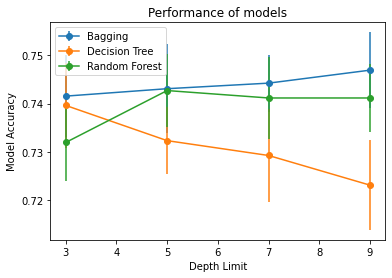

received all the accuracies
[[3, 0.7396153846153847, 0.008821873031674293], [5, 0.7323076923076923, 0.006969926947738023], [7, 0.7292307692307693, 0.009610768122544907], [9, 0.7230769230769231, 0.009278721601396015]]
[[3, 0.7415384615384616, 0.008492948693757243], [5, 0.7430769230769231, 0.009179343932416185], [7, 0.7442307692307693, 0.00591482942278065], [9, 0.7469230769230769, 0.007859716784273729]]
[[3, 0.731923076923077, 0.00788320812957524], [5, 0.7426923076923078, 0.007565297602252729], [7, 0.741153846153846, 0.0085146931829632], [9, 0.7411538461538462, 0.007051165500202255]]
Value of p: 0.09657554057555477
Accepting null hypothesis


In [9]:
pool = Pool(processes=6)
train_df = pd.read_csv('trainingSet.csv')
test_df = pd.read_csv('testSet.csv')
train_df = train_df.sample(random_state=18, frac=1)
percent = 0.5
half_train_df = train_df.sample(random_state=32, frac=percent)
len(half_train_df)
fold_number = 10
fold_data_list = get_kfold_split(half_train_df, fold_number)
depth_list = [3,5, 7, 9]
dt_model_accuracy_depth, bt_model_accuracy_depth, rf_model_accuracy_depth = compare_models(pool, fold_data_list, depth_list, fold_number)
print("received all the accuracies")
pool.close()
print(dt_model_accuracy_depth)
print(bt_model_accuracy_depth)
print(rf_model_accuracy_depth)

# hypothesis testing
    
rf_model_accuracy_depth = [element[1] for element in rf_model_accuracy_depth]
bt_model_accuracy_depth = [element[1] for element in bt_model_accuracy_depth]
hypothesis = calculate_p_value(rf_model_accuracy_depth, bt_model_accuracy_depth)
print(hypothesis)

Fraction Analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import trees as q2
from multiprocessing import Pool
from itertools import repeat
import scipy.stats
# import cv_depth as cvd

def get_kfold_split(train_set, fold_number):
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

def get_train_test_data(fold_data_list, fraction, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    new_train_set = pd.concat(rem_set)
    new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    return new_train_set, test_set

def compare_models(pool, fold_data_list, fraction_list, fold_number):
    dt_model_accuracy = []
    bt_model_accuracy = []
    rf_model_accuracy = []
    train_set_list = {}
    test_set_list = {}
    for ind in range(fold_number):
        train_set_ind = {}
        test_set_ind = {}
        for frac in fraction_list:
            train, test = get_train_test_data(fold_data_list, frac, ind)
            train_set_ind[frac]=train
            test_set_ind[frac]=test
        train_set_list[ind] = train_set_ind
        test_set_list[ind] = test_set_ind
    for frac in fraction_list:
        print("Current fraction:", frac)
        dt_frac_accuracy = []
        bt_frac_accuracy = []
        rf_frac_accuracy = []
        for ind in range(fold_number):
            print("Current fold:", ind)
            # train_set, test_set = get_train_test_data(fold_data_list, frac, ind)
            # print(len(train_set), len(test_set))
            # train dt
            _ ,test_acc = q2.decisionTree(train_set_list[ind][frac], test_set_list[ind][frac], 8) 
            # print("DT acc:", test_acc)
            dt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # train bt
            _ ,test_acc = q2.bagging(pool, train_set_list[ind][frac], test_set_list[ind][frac], 8, 30) 
            # print("Bagging acc", test_acc)
            bt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # #dataset for NBC
            # train_df, test_df = get_train_test_data_nbc(fold_data_list_nbc, frac, ind)
            # target_col = 'decision'
            
            #train rf
            _ ,test_acc = q2.randomForests(pool, train_set_list[ind][frac], test_set_list[ind][frac], 8, 30) 
            # print("Random Forest acc", test_acc)
            rf_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

        dt_mean = np.mean(dt_frac_accuracy)
        dt_std = np.sqrt(np.var(dt_frac_accuracy))
        dt_std_err = dt_std/np.sqrt(fold_number)
        dt_model_accuracy.append([frac, dt_mean, dt_std_err])

        bt_mean = np.mean(bt_frac_accuracy)
        bt_std = np.sqrt(np.var(bt_frac_accuracy))
        bt_std_err = bt_std/np.sqrt(fold_number)
        bt_model_accuracy.append([frac, bt_mean, bt_std_err])

        rf_mean = np.mean(rf_frac_accuracy)
        rf_std = np.sqrt(np.var(rf_frac_accuracy))
        rf_std_err = rf_std/np.sqrt(fold_number)
        rf_model_accuracy.append([frac, rf_mean, rf_std_err])
        print("DT:{}, Bagging:{}, Random Forest:{}".format(dt_mean, bt_mean, rf_mean))

    dt_data = np.array(dt_model_accuracy)
    bt_data = np.array(bt_model_accuracy)
    rf_data = np.array(rf_model_accuracy)
    # dataset_size = [element*4680 for element in fraction_list]
    plt.errorbar(fraction_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
    plt.errorbar(fraction_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
    plt.errorbar(fraction_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
    plt.xlabel('Fraction Size')
    plt.ylabel('Model Accuracy')
    plt.title('Performance of models')
    plt.legend()
    plt.show()
    return dt_model_accuracy, bt_model_accuracy, rf_model_accuracy

def calculate_p_value(svm_data, lr_data):
    p = scipy.stats.ttest_rel(lr_data, svm_data).pvalue
    print("Value of p:" , p)
    if p<0.01:
        return "Accepting alternative hypothesis and rejecting null hypothesis"
    else:
        return "Accepting null hypothesis"

Current fraction: 0.05
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
DT:0.6942307692307692, Bagging:0.7088461538461539, Random Forest:0.7080769230769232
Current fraction: 0.075
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
DT:0.6925000000000001, Bagging:0.7190384615384614, Random Forest:0.7215384615384616
Current fraction: 0.1
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current

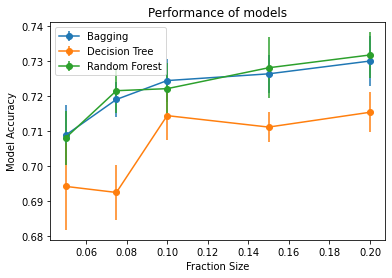

Value of p: 0.004164989924206315
Accepting alternative hypothesis and rejecting null hypothesis


In [11]:
pool = Pool(processes=6)
train_df = pd.read_csv('trainingSet.csv')
# test_df = pd.read_csv('testSet.csv')
train_df = train_df.sample(random_state=18, frac=1)
fold_number = 10
fold_data_list = get_kfold_split(train_df, fold_number)
fraction_list = [0.05, 0.075, 0.1, 0.15, 0.2]
# fraction_list = [0.05, 0.075]
dt_model_accuracy_frac, bt_model_accuracy_frac, rf_model_accuracy_frac = compare_models(pool, fold_data_list, fraction_list, fold_number)
pool.close()

# hypothesis testing
    
rf_model_accuracy = [element[1] for element in dt_model_accuracy_frac]
bt_model_accuracy = [element[1] for element in bt_model_accuracy_frac]
hypothesis = calculate_p_value(rf_model_accuracy, bt_model_accuracy)
print(hypothesis)

Number of trees analysis

In [12]:
import pandas as pd
import numpy as np
import sys
import random
import matplotlib.pyplot as plt
import trees as q2
from multiprocessing import Pool
from itertools import repeat
import scipy.stats

def get_kfold_split(train_set, fold_number):
    fold_size=len(train_set)/fold_number
    fold_data_list=[]
    for i in range(fold_number):
        new_fold=train_set.iloc[int(i*fold_size):int((i+1)*fold_size),:]
        fold_data_list.append(new_fold)
    return fold_data_list

def get_train_test_data(fold_data_list, fraction, ind):
    test_set = fold_data_list[ind]
    rem_set = []
    for k, data in enumerate(fold_data_list):
        if(k!=ind):
            rem_set.append(fold_data_list[k])
    new_train_set = pd.concat(rem_set)
    new_train_set = new_train_set.sample(random_state=32, frac=fraction)
    return new_train_set, test_set



# def compare_models(fold_data_list, tree_list, fold_number):
#     dt_model_accuracy = []
#     bt_model_accuracy = []
#     rf_model_accuracy = []
#     for t in tree_list:
#         print("No of trees:", t)
#         dt_frac_accuracy = []
#         bt_frac_accuracy = []
#         rf_frac_accuracy = []
#         for ind in range(fold_number):
#             print("Current fold:", ind)
#             train_set, test_set = get_train_test_data(fold_data_list, 1, ind)
#             # print(len(train_set), len(test_set))
#             # train dt
#             _ ,test_acc = q2.decisionTree(train_set, test_set, 8) 
#             print("DT", test_acc)
#             dt_frac_accuracy.append(test_acc)
#             # q2.print_accuracy(train_acc, test_acc, '1')

#             # train bt
#             _ ,test_acc = q2.bagging(train_set, test_set, 8, t) 
#             bt_frac_accuracy.append(test_acc)
#             print("BT", test_acc)
#             # q2.print_accuracy(train_acc, test_acc, '1')

#             # #dataset for NBC
#             # train_df, test_df = get_train_test_data_nbc(fold_data_list_nbc, frac, ind)
#             # target_col = 'decision'
            
#             #train rf
#             _ ,test_acc = q2.randomForests(train_set, test_set, 8, t) 
#             rf_frac_accuracy.append(test_acc)
#             print("RF", test_acc)
#             # q2.print_accuracy(train_acc, test_acc, '1')

#         dt_mean = np.mean(dt_frac_accuracy)
#         dt_std = np.sqrt(np.var(dt_frac_accuracy))
#         dt_std_err = dt_std/np.sqrt(fold_number)
#         dt_model_accuracy.append([t, dt_mean, dt_std_err])

#         bt_mean = np.mean(bt_frac_accuracy)
#         bt_std = np.sqrt(np.var(bt_frac_accuracy))
#         bt_std_err = bt_std/np.sqrt(fold_number)
#         bt_model_accuracy.append([t, bt_mean, bt_std_err])

#         rf_mean = np.mean(rf_frac_accuracy)
#         rf_std = np.sqrt(np.var(rf_frac_accuracy))
#         rf_std_err = rf_std/np.sqrt(fold_number)
#         rf_model_accuracy.append([t, rf_mean, rf_std_err])

#         print("DT:{}, Bagging:{}, Random Forest:{}".format(dt_mean, bt_mean, rf_mean))

#     dt_data = np.array(dt_model_accuracy)
#     bt_data = np.array(bt_model_accuracy)
#     rf_data = np.array(rf_model_accuracy)
#     # dataset_size = [element*4680 for element in fraction_list]
#     plt.errorbar(tree_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
#     plt.errorbar(tree_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
#     plt.errorbar(tree_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
#     plt.xlabel('Number of Trees')
#     plt.ylabel('Model Accuracy')
#     plt.title('Performance of models')
#     plt.legend()
#     plt.show()
#     return dt_model_accuracy, bt_model_accuracy, rf_model_accuracy

def compare_models(pool, fold_data_list, tree_list, fold_number):
    # dt_model_accuracy = []
    bt_model_accuracy = []
    rf_model_accuracy = []
    train_set_list = []
    test_set_list = []
    # pool1 = Pool(processes=5)
    # pool2 = Pool(processes=5)
    # pool3 = Pool(processes=5)
    for ind in range(fold_number):
        # print("Current fold:", ind)
        train_set_ind, test_set_ind = get_train_test_data(fold_data_list, 1, ind)
        train_set_list.append(train_set_ind)
        test_set_list.append(test_set_ind)
    for t in tree_list:
        print("No of trees:", t)
        # dt_frac_accuracy = []
        bt_frac_accuracy = []
        rf_frac_accuracy = []
        for ind in range(fold_number):
            print("Current fold:", ind)
            # print("with multiprocessing")
            # train_set, test_set = get_train_test_data(fold_data_list, 1, ind)
            # print(len(train_set), len(test_set))
            # train dt
            # _ ,test_acc = q2.decisionTree(train_set_list[ind], test_set_list[ind], 8) 
            # # print("DT", test_acc)
            # dt_frac_accuracy.append(test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

            # train bt
            _ ,test_acc = q2.bagging(pool, train_set_list[ind], test_set_list[ind], 8, t) 
            bt_frac_accuracy.append(test_acc)
            
            #train rf
            _ ,test_acc = q2.randomForests(pool, train_set_list[ind], test_set_list[ind], 8, t) 
            rf_frac_accuracy.append(test_acc)
            # print("RF", test_acc)
            # q2.print_accuracy(train_acc, test_acc, '1')

        # dt_mean = np.mean(dt_frac_accuracy)
        # dt_std = np.sqrt(np.var(dt_frac_accuracy))
        # dt_std_err = dt_std/np.sqrt(fold_number)
        # dt_model_accuracy.append([t, dt_mean, dt_std_err])

        bt_mean = np.mean(bt_frac_accuracy)
        bt_std = np.sqrt(np.var(bt_frac_accuracy))
        bt_std_err = bt_std/np.sqrt(fold_number)
        bt_model_accuracy.append([t, bt_mean, bt_std_err])

        rf_mean = np.mean(rf_frac_accuracy)
        rf_std = np.sqrt(np.var(rf_frac_accuracy))
        rf_std_err = rf_std/np.sqrt(fold_number)
        rf_model_accuracy.append([t, rf_mean, rf_std_err])

        print("Bagging:{}, Random Forest:{}".format( bt_mean, rf_mean))

    # dt_data = np.array(dt_model_accuracy)
    bt_data = np.array(bt_model_accuracy)
    rf_data = np.array(rf_model_accuracy)
    # dataset_size = [element*4680 for element in fraction_list]
    plt.errorbar(tree_list, bt_data[:, 1], yerr=bt_data[:, 2], label='Bagging', marker = 'o')
    # plt.errorbar(tree_list, dt_data[:, 1], yerr=dt_data[:, 2], label='Decision Tree', marker = 'o')
    plt.errorbar(tree_list, rf_data[:, 1], yerr=rf_data[:, 2], label='Random Forest', marker = 'o')
    plt.xlabel('Number of Trees')
    plt.ylabel('Model Accuracy')
    plt.title('Performance of models')
    plt.legend()
    plt.show()
    return bt_model_accuracy, rf_model_accuracy

def calculate_p_value(svm_data, lr_data):
    p = scipy.stats.ttest_rel(lr_data, svm_data).pvalue
    print("Value of p:" , p)
    if p<0.01:
        return "Accepting alternative hypothesis and rejecting null hypothesis"
    else:
        return "Accepting null hypothesis"

2600
No of trees: 10
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
Bagging:0.7469230769230769, Random Forest:0.7403846153846154
No of trees: 20
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold: 9
In BT
In RF
Bagging:0.7473076923076923, Random Forest:0.7407692307692308
No of trees: 40
Current fold: 0
In BT
In RF
Current fold: 1
In BT
In RF
Current fold: 2
In BT
In RF
Current fold: 3
In BT
In RF
Current fold: 4
In BT
In RF
Current fold: 5
In BT
In RF
Current fold: 6
In BT
In RF
Current fold: 7
In BT
In RF
Current fold: 8
In BT
In RF
Current fold:

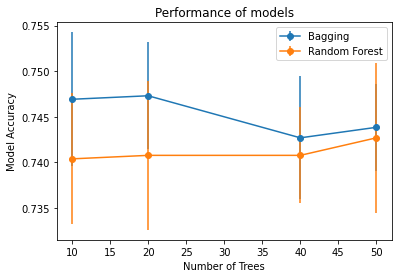

Value of p: 0.06890350891195932
Accepting null hypothesis


In [13]:
pool = Pool(processes=6)
train_df = pd.read_csv('trainingSet.csv')
# test_df = pd.read_csv('testSet.csv')
train_df = train_df.sample(random_state=18, frac=1)
percent = 0.5
half_train_df = train_df.sample(random_state=32, frac=percent)
print(len(half_train_df))
fold_number = 10
fold_data_list = get_kfold_split(half_train_df, fold_number)
tree_list = [10, 20, 40, 50]
# tree_list = [10, 20]
bt_model_accuracy_trees, rf_model_accuracy_trees = compare_models(pool, fold_data_list, tree_list, fold_number)
pool.close()

# hypothesis testing
    
rf_model_accuracy = [element[1] for element in rf_model_accuracy_trees]
bt_model_accuracy = [element[1] for element in bt_model_accuracy_trees]
hypothesis = calculate_p_value(rf_model_accuracy, bt_model_accuracy)
print(hypothesis)